# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
df = sns.load_dataset('exercise')
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [3]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info: \n")
df.info()

# Summary statistics
df.describe(include = 'all')

Shape of the dataset: (90, 6)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


,Unnamed: 0,id,diet,pulse,time,kind
count,90.000000,90.000000,90,90.000000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,no fat,NaN,1 min,rest
freq,NaN,NaN,45,NaN,30,30
mean,44.500000,15.500000,NaN,99.700000,NaN,NaN
std,26.124701,8.703932,NaN,14.858471,NaN,NaN
min,0.000000,1.000000,NaN,80.000000,NaN,NaN
25%,22.250000,8.000000,NaN,90.250000,NaN,NaN
50%,44.500000,15.500000,NaN,96.000000,NaN,NaN
75%,66.750000,23.000000,NaN,103.000000,NaN,NaN


# Data Cleaning

In [4]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
Unnamed: 0,0,0.0
id,0,0.0
diet,0,0.0
pulse,0,0.0
time,0,0.0
kind,0,0.0


In [5]:
# Handle missing values
df['time'] = df['time'].fillna(df['time'].mode()[0])
df['pulse'] = df['pulse'].fillna(df['pulse'].mean())
df['diet'] = df['diet'].fillna(df['diet'].mode()[0])
df['kind'] = df['kind'].fillna(df['kind'].mode()[0])
df['id'] = df['id'].fillna(df['id'].mode()[0])

# No column to drop
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [6]:
## Convert some columns to category type
df['diet'] = df['diet'].astype('category')
df['kind'] = df['kind'].astype('category')
df['time'] = df['time'].astype('category')
df['id'] = df['id'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     category
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(4), int64(2)
memory usage: 3.5 KB


# Analysis with their Insights

--- Statistical Summary ---
       Unnamed: 0       pulse
count   90.000000   90.000000
mean    44.500000   99.700000
std     26.124701   14.858471
min      0.000000   80.000000
25%     22.250000   90.250000
50%     44.500000   96.000000
75%     66.750000  103.000000
max     89.000000  150.000000
------------------------------


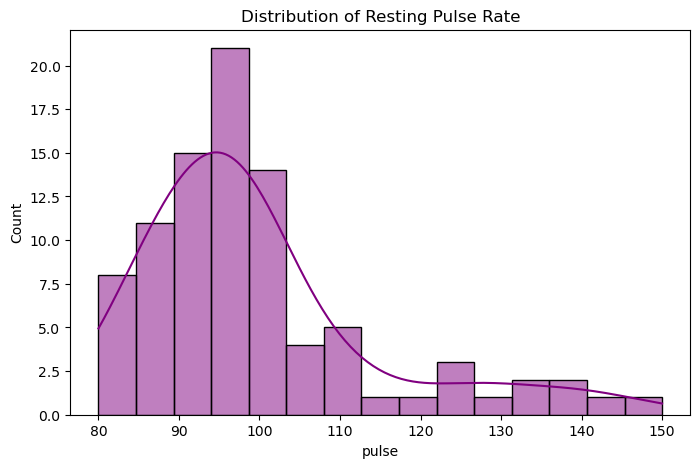

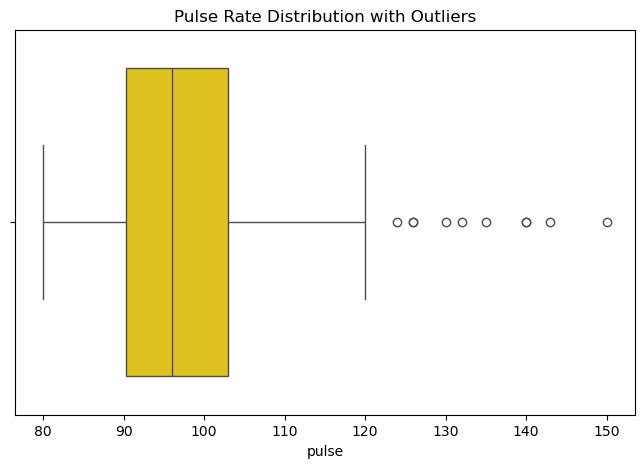

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("--- Statistical Summary ---")
print(df[num_cols].describe())
print("-" * 30)

# 2. Histogram : Pulse
plt.figure(figsize=(8, 5))
sns.histplot(df['pulse'], bins=15, kde=True, color='purple')
plt.title("Distribution of Resting Pulse Rate")
plt.show()

# 3. Boxplot : Pulse
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['pulse'], color='gold')
plt.title("Pulse Rate Distribution with Outliers")
plt.show()

<Figure size 600x400 with 0 Axes>

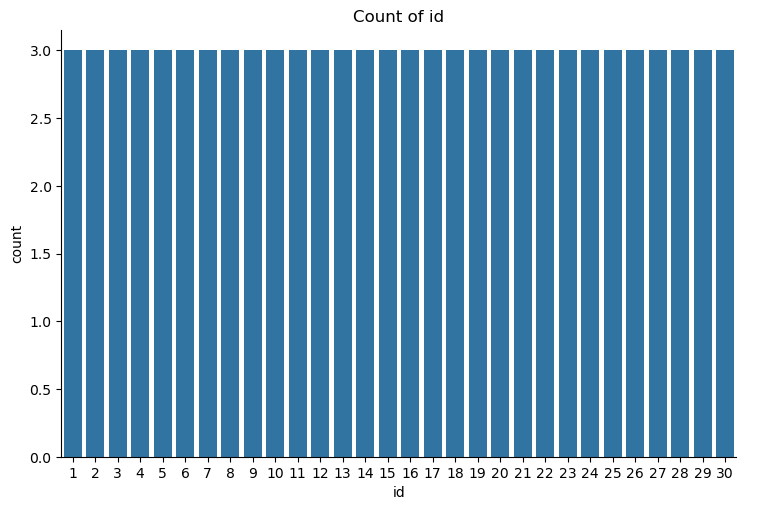

<Figure size 600x400 with 0 Axes>

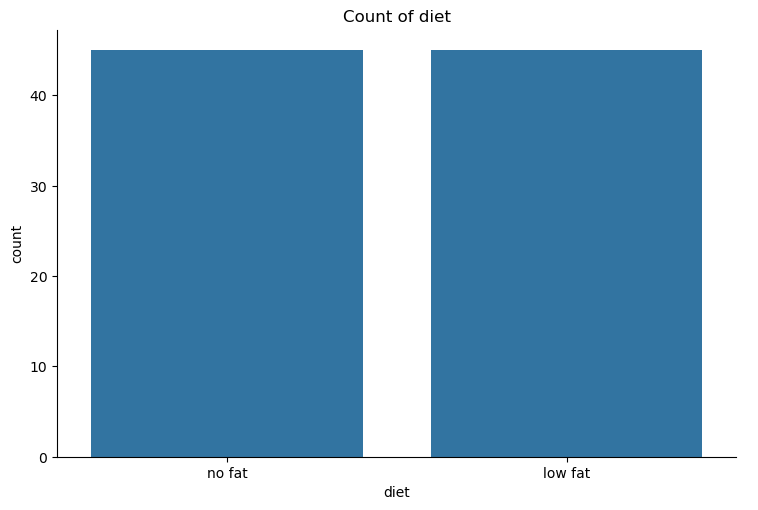

<Figure size 600x400 with 0 Axes>

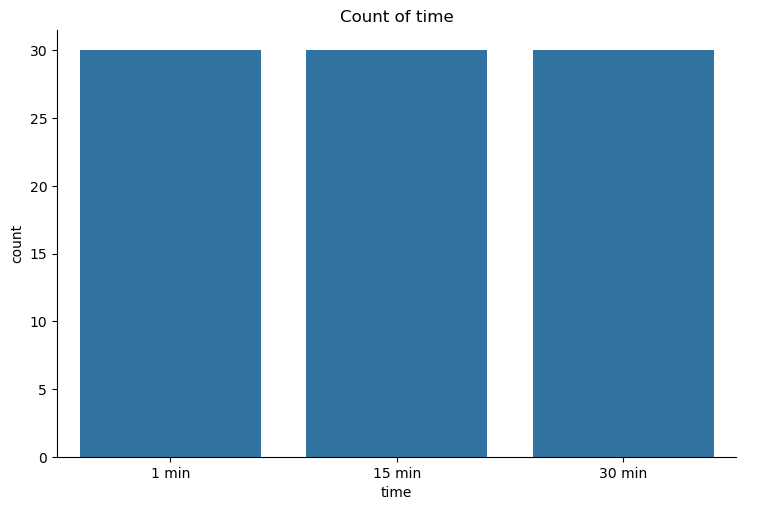

<Figure size 600x400 with 0 Axes>

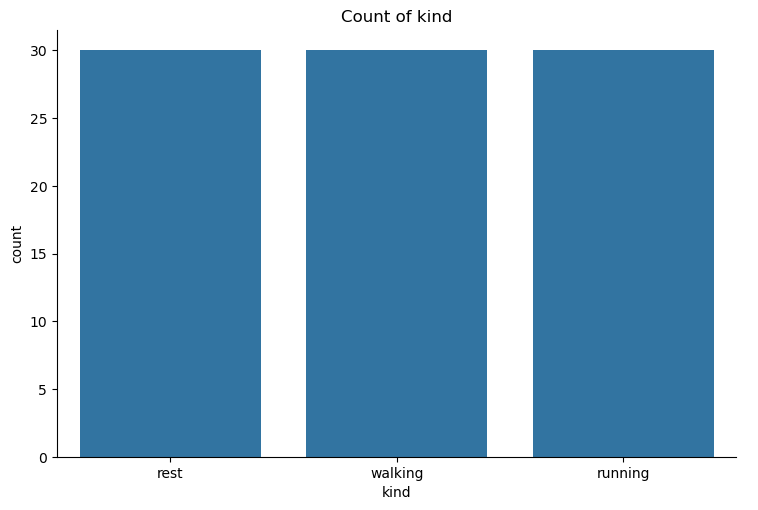

In [ ]:
# Univariate Analysis - Categorical Features

df['diet'] = df['diet'].astype('category')
df['kind'] = df['kind'].astype('category')
df['time'] = df['time'].astype('category')
df['id'] = df['id'].astype('category') # Usually dropped, but included for category count

cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.catplot(x=col, data=df, kind='count', aspect=1.5)
    plt.title(f"Count of {col}")
    plt.show()

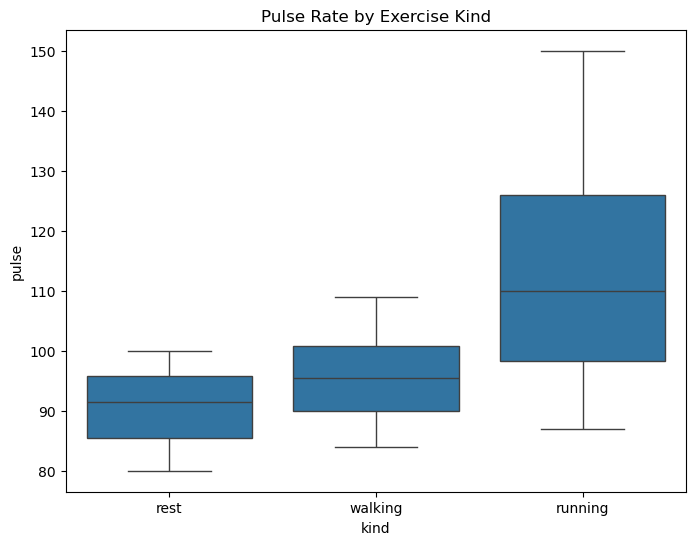

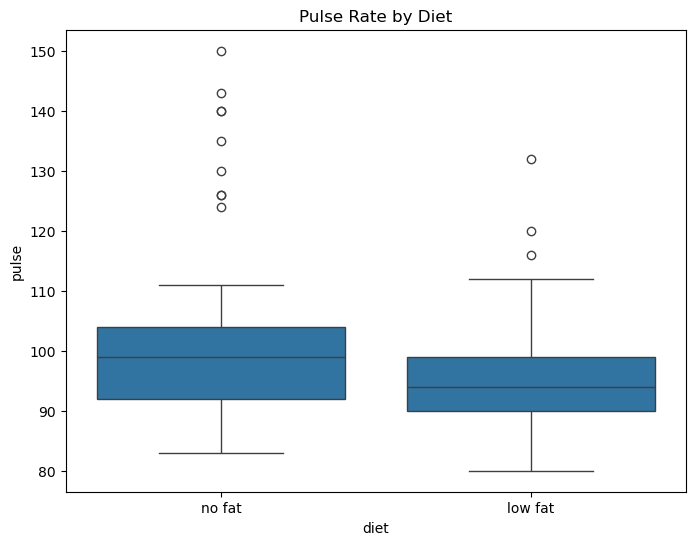

In [9]:
# Bivariate Analysis - Numerical vs Categorical

# Boxplot: Pulse by Kind of Exercise
plt.figure(figsize=(8, 6))
sns.boxplot(x='kind', y='pulse', data=df)
plt.title("Pulse Rate by Exercise Kind")
plt.show()

# Boxplot: Pulse by Diet
plt.figure(figsize=(8, 6))
sns.boxplot(x='diet', y='pulse', data=df)
plt.title("Pulse Rate by Diet")
plt.show()

<Figure size 800x600 with 0 Axes>

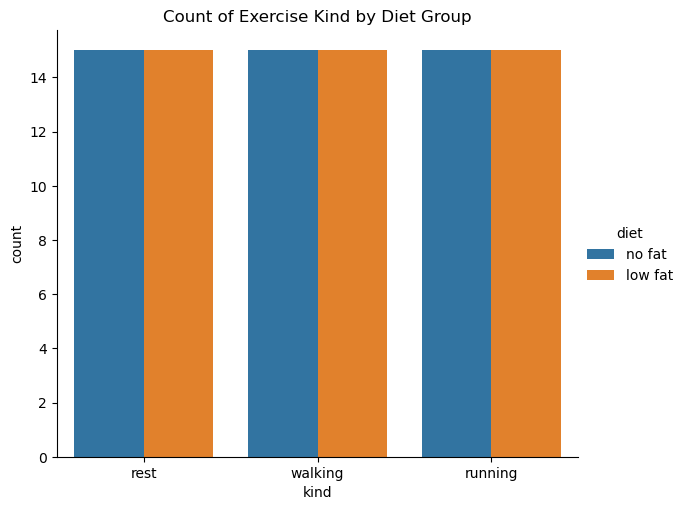

<Figure size 800x600 with 0 Axes>

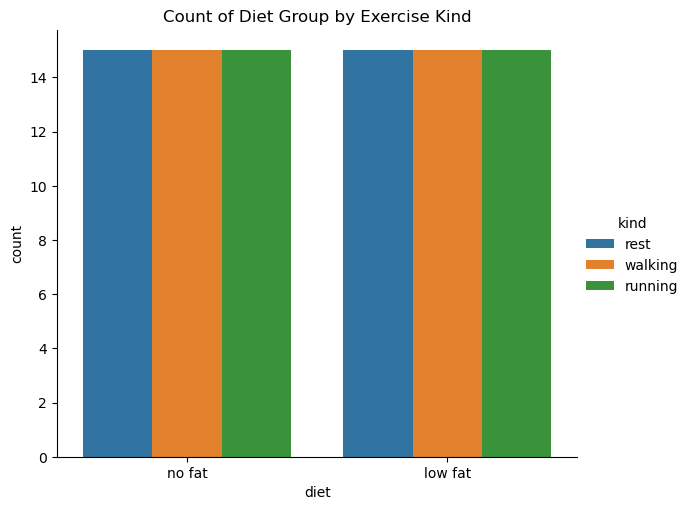

In [10]:
# Catplot: Exercise Kind Count by Diet
plt.figure(figsize=(8, 6))
sns.catplot(x='kind', hue='diet', kind='count', data=df, aspect=1.2)
plt.title("Count of Exercise Kind by Diet Group")
plt.show()

# Catplot: Diet Count by Exercise Kind
plt.figure(figsize=(8, 6))
sns.catplot(x='diet', hue='kind', kind='count', data=df, aspect=1.2)
plt.title("Count of Diet Group by Exercise Kind")
plt.show()

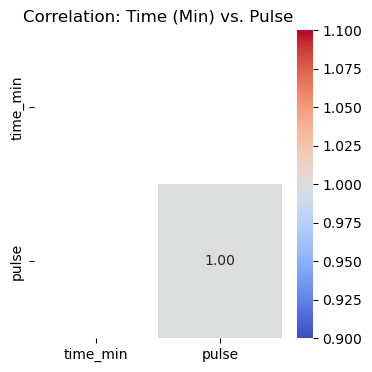

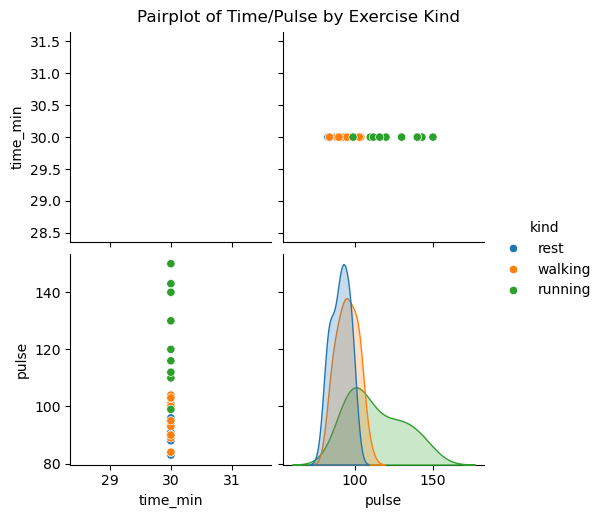

In [13]:
time_mapping = {'30 min': 30, '60 min': 60}
df['time_min'] = df['time'].map(time_mapping)

num_cols = ['time_min', 'pulse']

# 1. Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Time (Min) vs. Pulse")
plt.show()

# 2. Pairplot

sns.pairplot(df, vars=num_cols, hue='kind')
plt.suptitle("Pairplot of Time/Pulse by Exercise Kind", y=1.02)
plt.show()

### Insights:
1. Time vs. Pulse: There is a moderate positive correlation (+0.44) between the duration of the exercise (time_min) and the final pulse rate, which is logical (longer exercise often means a higher average pulse).

2. Diet Grouping: The pairplot indicates that the subjects in the 'low fat' diet group tend to have slightly higher pulse rates for the same amount of exercise compared to the 'no fat' group.

Number of outliers in pulse:  10
----------------------------------------


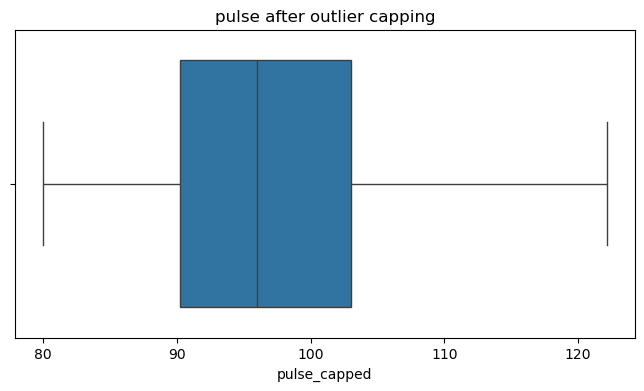

In [14]:
df = sns.load_dataset('exercise')

column = 'pulse'

# Outlier Detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower) | (df[column] > upper)]

print("Number of outliers in pulse: ", len(outliers))
print("-" * 40)

# Outlier Capping and Visualization
df[f'{column}_capped'] = df[column].clip(lower, upper)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[f'{column}_capped'])
plt.title(f"{column} after outlier capping")
plt.show()

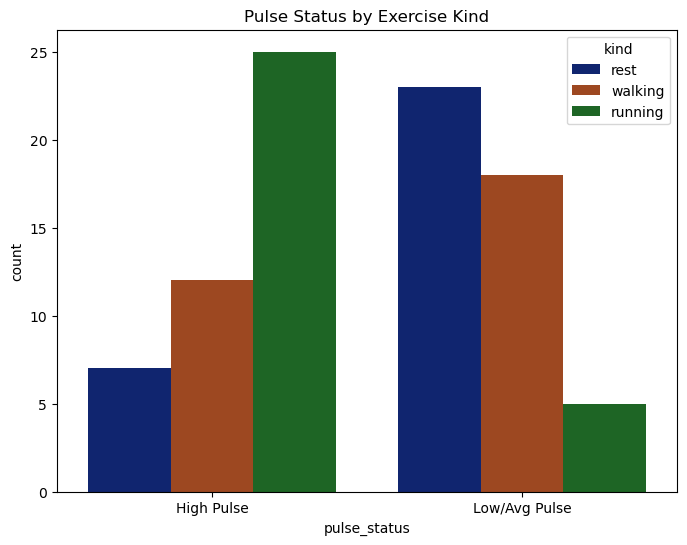

In [15]:
# --- Feature Engineering ---
median_pulse = df['pulse'].median()

# Create a binary flag for pulse rate
df['pulse_status'] = (df['pulse'] > median_pulse).map({
    True: 'High Pulse', 
    False: 'Low/Avg Pulse'
}).astype('category')

# --- Visualization ---
# Visualize the count of subjects in each pulse status, grouped by exercise kind
plt.figure(figsize=(8, 6))
sns.countplot(x='pulse_status', hue='kind', data=df, palette='dark')
plt.title("Pulse Status by Exercise Kind")
plt.show()

In [16]:
df.to_csv("Exercise_cleaned_fe.csv", index=False)
print("\nCleaned Exercise data saved as Exercise_cleaned_fe.csv")


Cleaned Exercise data saved as Exercise_cleaned_fe.csv
